<a href="https://colab.research.google.com/github/Abhinav-Shandilya/ML101/blob/master/CR_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from pprint import pprint
from matplotlib import pyplot

import gc

%matplotlib inline

pd.set_option('display.max_rows', 500)

In [ ]:
# Reading the dataset
df = pd.read_csv('/content/dataset - v2.csv')

## Basic EDA

In [ ]:
df.shape

(6246, 62)

In [ ]:
df.dtypes

decision_id       object
label             object
default          float64
v1               float64
v2               float64
v3               float64
v4               float64
v5               float64
v6               float64
v7               float64
v8               float64
v9               float64
v10              float64
v11              float64
v12              float64
v13              float64
v14              float64
v15              float64
v16              float64
v17              float64
v18              float64
v19              float64
v20              float64
v21              float64
v22              float64
v23              float64
v24              float64
v25              float64
v26              float64
v27              float64
v28              float64
v29              float64
v30              float64
v31              float64
v32              float64
v33              float64
v34              float64
v35              float64
v36              float64
v37              float64


In [ ]:
#Checking the cardinality in categorical columns
for col in ['brand', 'carrier', 'device_name', 'gms_version', 'manufacturer', 'network_type', 'screen_dpi']:
  print (col, ' ', df[col].unique())

brand   ['OPPO' '1cb6aef939f56e90' 'YU' '943a681d922e77b' 'samsung' 'realme'
 'vivo' 'xiaomi' nan 'Xiaomi' 'OnePlus' 'Redmi' 'Nokia' '7e4d22a0ca0244f7'
 'Sony' 'Realme' 'a7843bd50112ec71' '8bec5ad6eb021aa4' 'a17aca62e3b19b4d'
 '1208381842e66fb5' '8cb49a96badb7f12' 'motorola' 'HONOR' 'Itel'
 'Panasonic' 'TECNO' '27be5a2e9588597e' '8796dc833e34fc5c'
 'ab97eda887584573' 'e2384a33edeba437' 'b28e8768d9ec3285'
 '40f8abb15f6a5ef7' 'asus' '4ee5ecfd40fc3cd6' '17ca98a1a7dbbc22'
 '4107e8c9953e117c' 'Lenovo' 'Micromax' 'GIONEE' 'ffb6807133aecff9' 'XOLO'
 '10or' 'HUAWEI' 'POCO' 'lenovo' '7a01e20fb17e3eac' '1adf226181a300eb'
 'Infinix' 'Lava' 'google' 'lge' '251e29199c46a339' '5c8f49640f7eb224'
 'df7be29e346d4dde' 'a7c6dd6eae25d662' 'LAVA' '4450fcb19f81444a'
 '3a11767695dabcf9' 'b4c945ed35628b2b' 'b8d9440b1bcc0cb3'
 'd877a7b01ed5ba38' '77b4e1f04c46481e' 'cff5f4d85210c0d3'
 '649e96b8d01262a2' '1730e7cdbab4c55a' '677d624e76803d3e'
 '789c047a3b437159' '6ac06f95041ff894' '520c1e859a4c9f50'
 '47caa4baeae

In [ ]:
# Dropping the columns with very high
df.drop(['brand', 'carrier', 'device_name', 'gms_version', 'manufacturer', 'screen_dpi'], axis=1, inplace=True)

In [ ]:
df['label'].value_counts()

modeling    4661
oot         1585
Name: label, dtype: int64

In [ ]:
df['default'].value_counts()

0.0    3612
1.0    1049
Name: default, dtype: int64

In [ ]:
df.shape

(6246, 56)

In [ ]:
df = pd.get_dummies(df, columns=['network_type'])

In [ ]:
df.head()

,decision_id,label,default,v1,v2,v3,v4,v5,v6,v7,...,v49,v50,screen_height,screen_width,network_type_2G,network_type_3G,network_type_4G,network_type_Unknown,network_type_Unknown_0,network_type_Wifi
0,94dac214-e5d0-4758-b7ec-5a8e899b7f3e,modeling,0.0,0.0,41247.87,4526.83,0.0,73.0,15231.14,0.0,...,0.0,0.0,1456.0,720.0,0,0,0,0,1,0
1,bcab40cd-4aaa-43d2-ae82-7d9ba2ded0a9,modeling,1.0,1.0,10278.99,35633.86,0.0,24.0,55549.52,0.0,...,0.0,0.0,1456.0,720.0,0,0,0,0,1,0
2,c2f63ac4-e23c-40e7-8ef1-502c1d27df17,modeling,0.0,6.0,4603616.51,46242.48,0.0,354.0,542944.00,0.0,...,0.0,0.0,1423.0,720.0,0,0,1,0,0,0
3,dc8c2882-5868-470c-8669-9a7e87782a40,modeling,0.0,0.0,13656.98,15509.49,1.0,33.0,NaN,1.0,...,0.0,0.0,1776.0,1080.0,0,0,1,0,0,0
4,e40e990a-e89c-43c5-b933-f2b096aa1d35,modeling,1.0,7.0,3532898.80,16363.64,0.0,363.0,542944.00,0.0,...,0.0,0.0,1920.0,1080.0,0,0,0,0,0,1


In [ ]:
df.isna().sum()

decision_id                  0
label                        0
default                   1585
v1                        1200
v2                         238
v3                         247
v4                         314
v5                         238
v6                         628
v7                         314
v8                         378
v9                         314
v10                        637
v11                        238
v12                        239
v13                        314
v14                        330
v15                        238
v16                        238
v17                        328
v18                        637
v19                        637
v20                        238
v21                        637
v22                        238
v23                        238
v24                        637
v25                        637
v26                        238
v27                       1995
v28                        238
v29                        314
v30     

In [ ]:
Imputer = KNNImputer (n_neighbors = 3, weights='uniform', metric='nan_euclidean')

In [ ]:
numerics = ['float64', 'uint8']
temp_df = df.select_dtypes(include=numerics)

In [ ]:
temp_df.shape

(6246, 59)

In [ ]:
Imputer.fit(temp_df)
temp_df[:] = Imputer.transform(temp_df)

In [ ]:
temp_df.isna().sum()

default                   0
v1                        0
v2                        0
v3                        0
v4                        0
v5                        0
v6                        0
v7                        0
v8                        0
v9                        0
v10                       0
v11                       0
v12                       0
v13                       0
v14                       0
v15                       0
v16                       0
v17                       0
v18                       0
v19                       0
v20                       0
v21                       0
v22                       0
v23                       0
v24                       0
v25                       0
v26                       0
v27                       0
v28                       0
v29                       0
v30                       0
v31                       0
v32                       0
v33                       0
v34                       0
v35                 

In [ ]:
temp_df['decision_id'] = df['decision_id']
temp_df['label'] = df['label']

In [ ]:
#filtering data set for train/test and validation

train_df = temp_df.loc[temp_df.label == 'modeling']


In [ ]:
X = train_df.drop(['label', 'decision_id', 'default'],axis=1)
y = train_df[['default']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

## Random Forest Base Model

In [ ]:
class_weight={0:1,1:4}
clf_model = RandomForestClassifier(criterion="gini", n_jobs = -1, verbose = 2, n_estimators = 100,
                                   oob_score = True, random_state=43, min_samples_leaf=10, class_weight = class_weight)   
clf_model.fit(X_train,y_train)

<ipython-input-21-88f13c3d89fa>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_model.fit(X_train,y_train)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100building tree 6 of 100

building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100building tree 28 of 100

building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100building tree 37 of 100

building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.3s


building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomForestClassifier(class_weight={0: 1, 1: 4}, min_samples_leaf=10,
                       n_jobs=-1, oob_score=True, random_state=43, verbose=2)

In [ ]:
y_predict = clf_model.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
accuracy_score(y_test,y_predict)

0.7884203002144389

In [ ]:
confusion_matrix(y_test,y_predict, labels = [0,1])

array([[965, 131],
       [165, 138]])

In [ ]:
print (classification_report (y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      1096
         1.0       0.51      0.46      0.48       303

    accuracy                           0.79      1399
   macro avg       0.68      0.67      0.67      1399
weighted avg       0.78      0.79      0.78      1399



<Axes: >

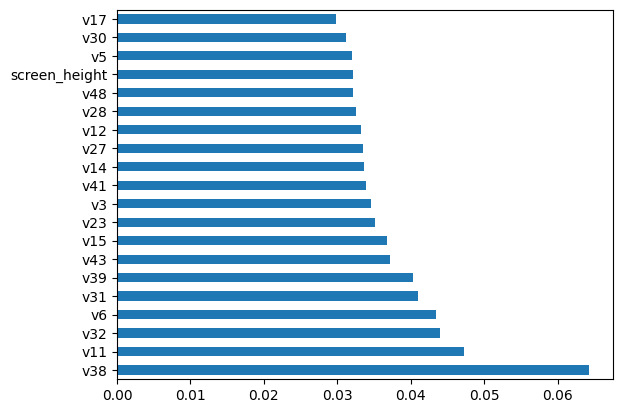

In [ ]:
feat_importances = pd.Series(clf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
#Getting the predictions
preds = clf_model.predict(temp_df.loc[temp_df.label == 'oot'].drop(['label', 'decision_id', 'default'],axis=1))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
type(preds)

numpy.ndarray

In [ ]:
output = pd.DataFrame(preds, columns = ['Prediction'])

In [ ]:
output['decision_id'] = df.loc[temp_df.label == 'oot'][['decision_id']].values

In [ ]:
output.head()

,Prediction,decision_id
0,0.0,7a74c817-f036-4214-ade0-e5bfa07fd0fc
1,0.0,7ba155b6-ce2c-432e-a717-163acd6306da
2,1.0,831a2f46-dbb4-47a9-9f3b-91ff7d0214d2
3,0.0,d4ec4849-b80e-49e9-a8a5-0e17f7d96c02
4,0.0,e67c5ff3-3751-40d4-b621-4987df98ce1b


In [ ]:
output.to_csv('output.csv', encoding='utf-8', index=False)

#GBM Base Model

In [ ]:
gbc_model = GradientBoostingClassifier( n_estimators=100,
                                  random_state=42)   
gbc_model.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=42)

In [ ]:
y_predict_gbc = gbc_model.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_predict_gbc, labels = [0,1])

array([[1051,   45],
       [ 234,   69]])

In [ ]:
print (classification_report (y_test,y_predict_gbc))

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88      1096
         1.0       0.61      0.23      0.33       303

    accuracy                           0.80      1399
   macro avg       0.71      0.59      0.61      1399
weighted avg       0.77      0.80      0.76      1399



<Axes: >

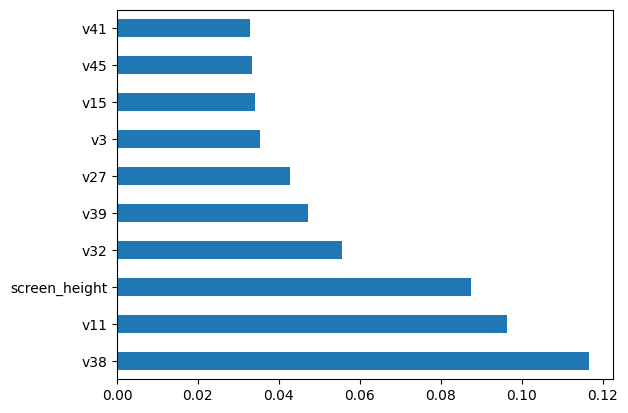

In [ ]:
feat_importances = pd.Series(gbc_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
preds = clf_model.predict(temp_df.loc[temp_df.label == 'oot'].drop(['label', 'decision_id', 'default'],axis=1))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
prediction_df = pd.DataFrame(preds.T, columns=['prediction'])

## Feature Selection usng Filter method

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs_top_50 = SelectKBest(score_func=f_classif, k= 50)
 # learn relationship from training data
 fs_top_50.fit(X_train, y_train)

 # transform train and test input data
 X_train_top_50 = fs_top_50.transform(X_train)
 X_test_top_50 = fs_top_50.transform(X_test)

 return X_train_top_50, X_test_top_50, fs_top_50
 

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 52.371645
Feature 1: 72.483973
Feature 2: 0.161524
Feature 3: 7.884004
Feature 4: 15.961700
Feature 5: 3.605207
Feature 6: 2.325785
Feature 7: 1.731490
Feature 8: 5.461983
Feature 9: 1.580925
Feature 10: 131.698632
Feature 11: 9.740864
Feature 12: 0.612109
Feature 13: 0.277049
Feature 14: 39.025317
Feature 15: 26.568876
Feature 16: 5.643193
Feature 17: 1.564377
Feature 18: 0.020407
Feature 19: 0.947716
Feature 20: 0.309187
Feature 21: 0.584076
Feature 22: 13.155053
Feature 23: 0.456815
Feature 24: 0.733173
Feature 25: 3.866740
Feature 26: 2.604164
Feature 27: 6.365671
Feature 28: 3.526795
Feature 29: 74.607336
Feature 30: 121.645431
Feature 31: 1.556981
Feature 32: 2.579427
Feature 33: 1.567671
Feature 34: 1.897318
Feature 35: 85.954567
Feature 36: 37.579189
Feature 37: 74.220405
Feature 38: 8.271088
Feature 39: 0.585542
Feature 40: 6.571457
Feature 41: 0.329030
Feature 42: 75.023527
Feature 43: 68.874806
Feature 44: 51.228147
Feature 45: 0.002602
Feature 46: 1.803761
Featur

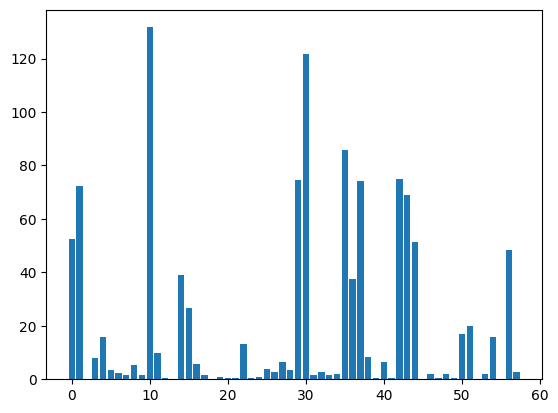

In [ ]:
# feature selection
X_train_top_50,X_test_top_50, fs_top_50 = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs_top_50.scores_)):
 print('Feature %d: %f' % (i, fs_top_50.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs_top_50.scores_))], fs_top_50.scores_)
pyplot.show()

In [ ]:
X_train_top_50.shape, X_train.shape

((3262, 50), (3262, 58))

In [ ]:
#Training and Validating the model by using a subset of feature
clf_model.fit(X_train_top_50,y_train)
y_predict_top_50 = clf_model.predict(X_test_top_50)

<ipython-input-51-2035ed75b5c9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_model.fit(X_train_top_50,y_train)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.3s


building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
accuracy_score(y_test,y_predict_top_50)

0.7884203002144389

In [ ]:
confusion_matrix(y_test,y_predict_top_50, labels = [0,1])

array([[972, 124],
       [172, 131]])

In [ ]:
print (classification_report (y_test,y_predict_top_50))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1096
         1.0       0.51      0.43      0.47       303

    accuracy                           0.79      1399
   macro avg       0.68      0.66      0.67      1399
weighted avg       0.78      0.79      0.78      1399

